# Loop Workflow Leaflet

> * High level approach to making a 3D model from just a bounding box and source files as input. (In Australia only for now. Documentation to come)
> * To run this notebook, please download and unzip the Turner Syncline data folder (https://github.com/Loop3D/Turner_Syncline/) into where this notebook is running.

In [1]:
%load_ext snakeviz

In [1]:
import folium
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import numpy as np

In [2]:
center=(-22.6,117.3)


wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)
# if(not test_data_name =='Draw Your Own'):
#     m.add_layer(example_rect)


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [3]:
map_crs = 'EPSG:4326'
proj_crs = 'EPSG:28350'

In [4]:
from geopandas import GeoDataFrame
from shapely.geometry import shape 
draw = dc.last_draw
poly = shape(draw['geometry'])
poly_gdf = GeoDataFrame([1], geometry=[poly], crs=map_crs)
bbox_gdf = poly_gdf.to_crs(proj_crs)
bbox_3d = {"minx": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
     "miny": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
     "maxx": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
     "maxy": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
     "base": -3200,
     "top": 1200,}

## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 506624.18651084 7486540.48794767  507782.98402641 7487799.25625798]
    CRS None
    # items 6
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 462767.41890042 7430805.86939398  646972.34891035 7532547.7895649 ]
    CRS None
    # items 25
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    empty file, check contents

 fault layer  metadata
--------------------
    bbox [ 499240.82857378 7485825.6543112   508810.16588626 7495167.58858864]
    CRS +init=epsg:28350 +type=crs
    # items 5
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 502147.40277673 7488324.38432102  502147.40277673 7488324.38432102]
    CRS None
    # items 1
    Data types ['Point']

Warnings:
     25 NaN/blank found in column "supersuite" of geology file, replacing with 0
     No fault dip estimate text for fault polylines
     No fault name for fault po

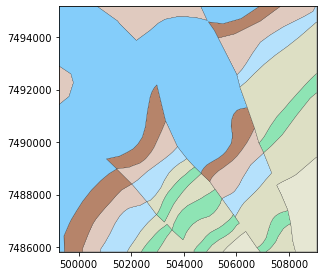

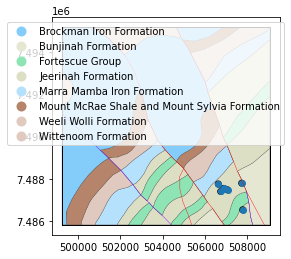

In [5]:
import os
import hjson
from map2loop.project import Project
%matplotlib inline
proj = Project( 
#                  geology_file="Turner_Syncline/tmp/geol_clip.shp",
#                  fault_file="Turner_Syncline/tmp/GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.csv",
#                  fold_file="Turner_Syncline/tmp/GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.csv",
#                  structure_file="Turner_Syncline/tmp/structure_clip.shp",
#                  mindep_file="Turner_Syncline/tmp/mindeps_clip.shp",
#                  metadata=os.path.abspath("Turner_Syncline/meta.hjson")
                 loopdata_state = "WA",)
#                  remote = True,
                 # path to hosted metadata describing the remote sources
#                  metadata='https://gist.githubusercontent.com/yohanderose/8f843de0dde531f009a3973cbdadcc9f/raw/918f412ae488ce1a6bca188306f7730061ecf551/meta_remote.hjson')                

proj.update_config(
                    out_dir='./gmdpaper-faultslip',
                    bbox_3d=bbox_3d,
                    proj_crs={'init': 'EPSG:28350'},
#                     quiet=True
                    overwrite='true',
                  )

  0%|          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
25  polygons
Successful parameter load
Output directory created at: ./gmdpaper-faultslip/graph
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Brockman Iron Formation'
3    'Bunjinah Formation'
4    'Fortescue Group'
5    'Jeerinah Formation'
6    'Marra Mamba Iron Formation'
7    'Mount McRae Shale and Mount Sylvia Formation'
8    'Weeli Wolli Formation'
9    'Wittenoom Formation'
Topology figure saved to ./gmdpaper-faultslip/tmp/topology-fig.png


 10%|█         | 10/100 [00:01<00:12,  7.22it/s]

Done
Fetching DTM...  bbox:116.89260647351574 117.18818097095013 -22.834905125006337 -22.550487944642196
Attempt: 0 dtm geotif saved as ./gmdpaper-faultslip/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./gmdpaper-faultslip/dtm/dtm_rp.tif


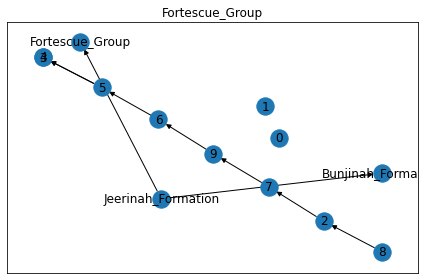

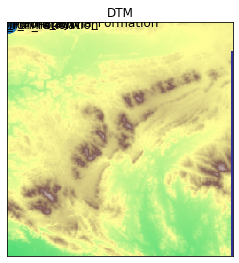

 50%|█████     | 50/100 [00:03<00:02, 18.77it/s]

group choices: 1
dtb and dtb_null set to 0
6 orientations saved to ./gmdpaper-faultslip/output/orientations.csv
extra orientations saved as /empty_series_orientations.csv
basal contacts saved allpts =  177 deci_pts =  80
saved as ./gmdpaper-faultslip/tmp/all_contacts.csv and ./gmdpaper-faultslip/tmp/contacts.csv
basal contacts without faults saved as ./gmdpaper-faultslip/tmp/basal_contacts.shp


 60%|██████    | 60/100 [00:04<00:02, 15.32it/s]

decimated contacts saved as ./gmdpaper-faultslip/output/contacts4.csv
All observations n= 6
groups ['Hamersley Group' 'Fortescue Group'] 
codes ['Wittenoom Formation' 'Mount McRae Shale and Mount Sylvia Formation'
 'Jeerinah Formation' 'Marra Mamba Iron Formation' 'Fortescue Group'
 'Weeli Wolli Formation' 'Brockman Iron Formation' 'Bunjinah Formation']


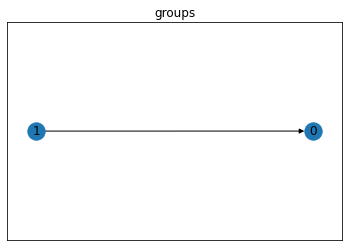

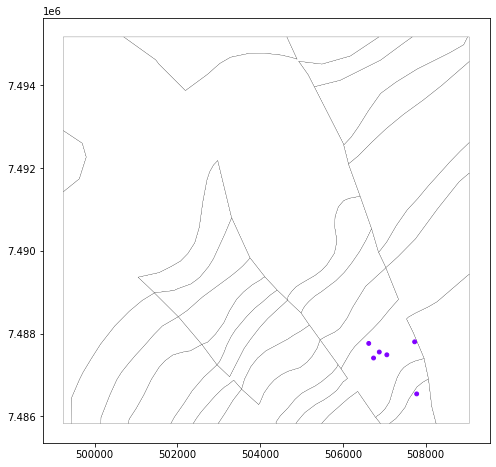

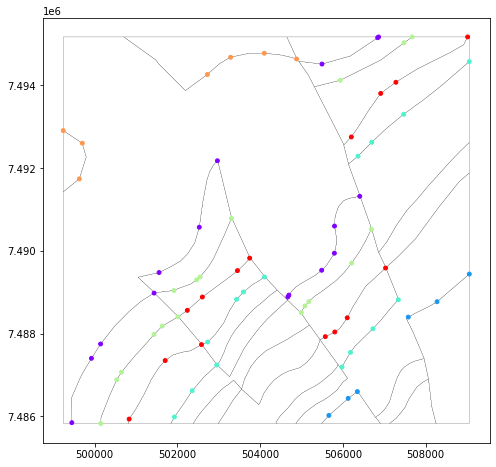

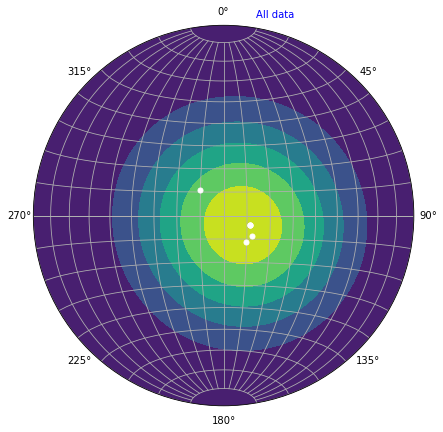

----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations has no observations
----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 6
strike/dip of girdle 311.1276353818197 / 87.63608535028612


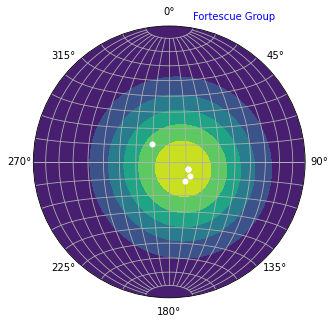

rbf_split 0 381
['Fortescue Group', 'Hamersley Group']
20 19
interpolated dips


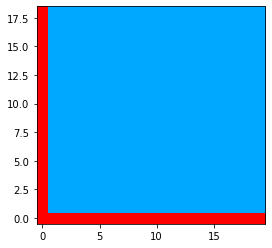

interpolated dip directions


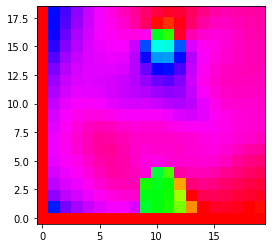

interpolated contacts


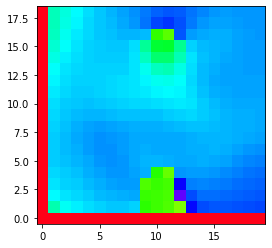

 70%|███████   | 70/100 [00:07<00:03,  8.60it/s]

fault orientations saved as ./gmdpaper-faultslip/output/fault_orientations.csv
fault positions saved as ./gmdpaper-faultslip/output/faults.csv
fault dimensions saved as ./gmdpaper-faultslip/output/fault_dimensions.csv


 90%|█████████ | 90/100 [00:11<00:01,  6.42it/s]

Fault Fault_7344 with displacement of 653 capped to 639.2379543215087
fault displacement estimates saved as ./gmdpaper-faultslip/output/fault_displacements3.csv
near-fault orientations saved as ./gmdpaper-faultslip/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./gmdpaper-faultslip/tmp/ex_f_combo_full.csv
0 Hamersley_Group
1 Fortescue_Group
pluton contacts and orientations saved as:
./gmdpaper-faultslip/output/ign_contacts.csv
./gmdpaper-faultslip/output/ign_orientations_domes.csv
Propagating dips along contacts...
20
33 points saved to ./gmdpaper-faultslip/tmp/raw_contacts.csv
24 thickness estimates saved as ./gmdpaper-faultslip/output/formation_thicknesses.csv
['Jeerinah_Formation' 'Wittenoom_Formation' 'Marra_Mamba_Iron_Formation'
 'Brockman_Iron_Formation' 'Mount_McRae_Shale_and_Mount_Sylvia_Formation'] already processed
0 min thickness estimates appended to ./gmdpaper-faultslip/output/formation_thicknesses.csv
Jeerinah_Formation 602.5 539.5224740453358
Wittenoom_Formatio

100%|██████████| 100/100 [00:12<00:00,  7.88it/s]

cycles []


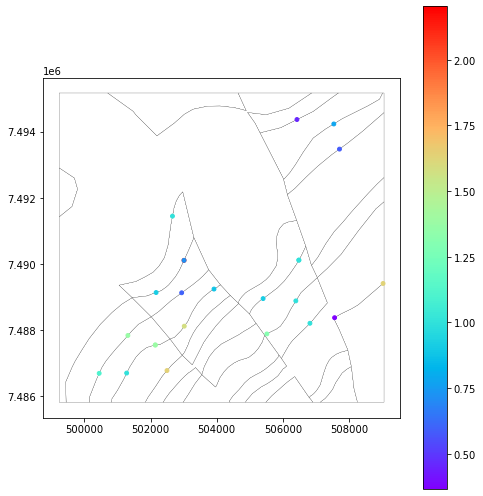

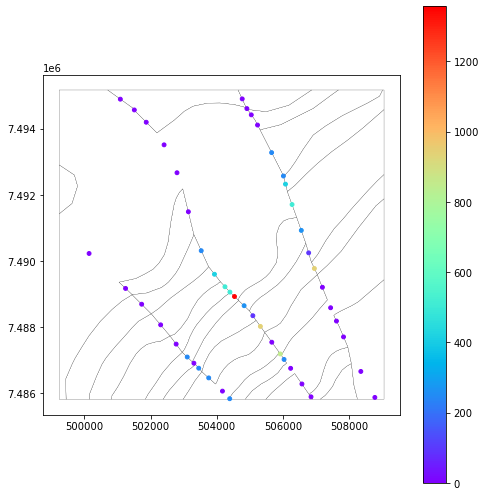

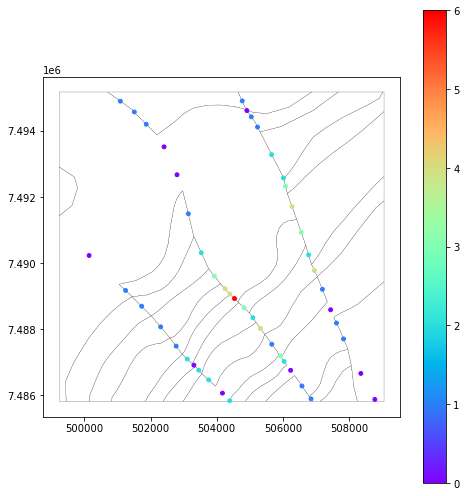

In [6]:
proj.run()

## Loop Structural

In [7]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv

In [8]:
from LoopStructural.utils import log_to_console
log_to_console('info')

In [9]:
tmp_path

'./gmdpaper-faultslip/tmp'

In [10]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.ERROR)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':1e5,
                'step':10,
                'fault_buffer':0.5,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}

if(not os.path.exists(fault_file)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()

    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=True,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)
else:
    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                              evaluate=True,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)



Updating geological model. There are: 
10 geological features that need to be interpolated



  0%|          | 0/10 [00:00<?, ?it/s]

Model update took: 5448.081546783447 seconds


In [12]:
view = LavaVuModelViewer(model)
view.add_model_surfaces()
view.add_data(model['supergroup_0'])
view.interactive()

  0%|          | 0/10 [00:00<?, ?it/s]

Adding surfaces took 0.5472860336303711 seconds


In [52]:
from LoopStructural.analysis import displacement_missfit
from LoopStructural.utils.helper import rotation
fname='Fault_8909'
angle = 90
fault_center = model.stratigraphic_column['faults'][fname]['FaultCenter']
fault_influence = m2l_data['stratigraphic_column']['faults'][fname]['InfluenceDistance']
fault_extent = m2l_data['stratigraphic_column']['faults'][fname]['HorizontalRadius'] 
fault_vertical_radius = m2l_data['stratigraphic_column']['faults'][fname]['VerticalRadius']
mask2 = np.logical_and(m2l_data['data']['feature_name']==fname,~np.isnan(m2l_data['data']['gx']))
fault_normal = m2l_data['data'].loc[mask2,['gx','gy','gz']].mean().to_numpy()
fault_normal /= np.linalg.norm(fault_normal)
v = np.dot(rotation(fault_normal,angle),np.array([0,0,1]))

In [53]:
fv, dv, feature = displacement_missfit(0,v,fault_center,fault_influence,fault_extent,fault_vertical_radius,fault_normal,'Fault_3498',model,fault_params)

In [54]:
view = LavaVuModelViewer(model)
view.add_isosurface(model[fname],value=0)
view.add_isosurface(feature,nslices=4)
view.add_data(model['supergroup_0'])
view.interactive()

No surface found at the given iso value.
No surface found at the given iso value.
No surface found at the given iso value.
No surface found at the given iso value.



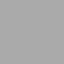

In [12]:
view2 = LavaVuModelViewer(model,vertical_exaggeration=1) 
view2.nsteps = np.array([200,200,200])
#view.set_zscale(2)
# view2.add_fault_displacements()

view2.nsteps=np.array([200,200,50])
name = 'Fault_15552'
# filename=vtk_path+'surface_name_{}.vtk'
for i in range(3):
    view2.add_isosurface(model[name][i],nslices=5)
    view2.add_data(model[name][i])
# view2.add_isosurface(model[name][1],nslices=5)
# view2.add_isosurface(model[name][2],nslices=5)

view2.add_vector_field(model[name][1],locations=model.regular_grid()[::100])#filename=filename)
#view.lv.webgl(vtk_path+test_data_name)

#view.interactive()  


view2.interactive()

In [21]:
import pandas as pd
fat = pd.read_csv(proj.config.output_path + 'fold_axial_traces.csv')
# fold axial traces saved as ./interactive_model-wa/output/fold_axial_traces.csv
fat_o = pd.read_csv(proj.config.output_path + 'fold_axial_trace_orientations2.csv')

In [13]:
view.lv.webgl('testm2l')

In [22]:
string = fat.loc[:,'code'].to_numpy()

In [23]:
fat_id = []
for n in string:
    fat_id.append(int(n[3:]))

<AxesSubplot:>

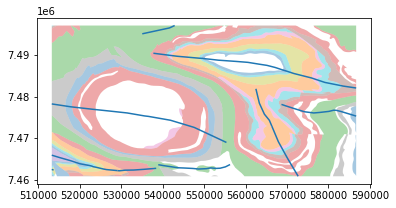

In [30]:
fat_id = np.array(fat_id)
import geopandas
import matplotlib.pyplot as plt
folds = geopandas.read_file(proj.config.tmp_path+'folds_clip.shp')
geol = geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')
folds[folds['feature']=='Fold axial trace'].plot()
geol.plot(column='formation',ax=plt.gca(),alpha=0.4)

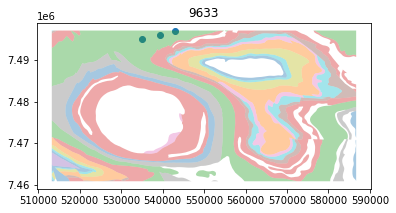

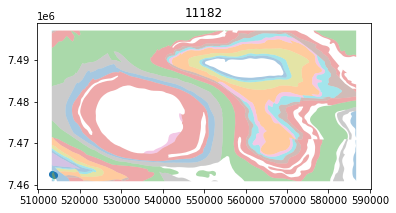

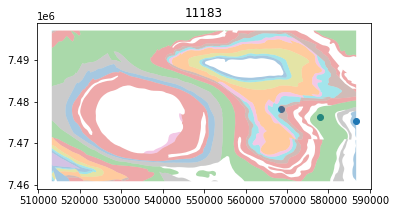

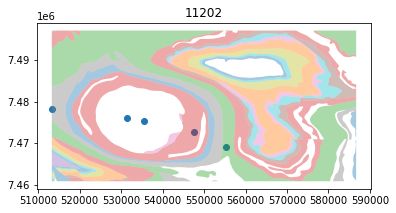

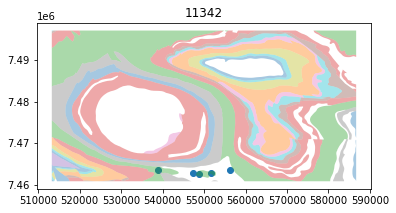

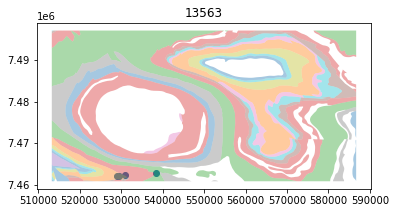

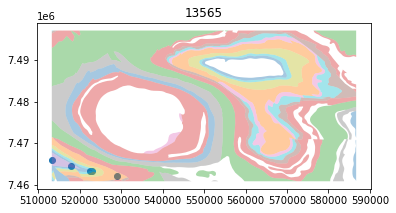

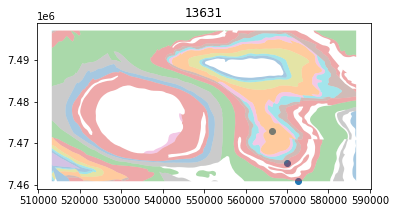

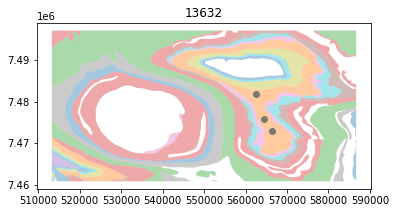

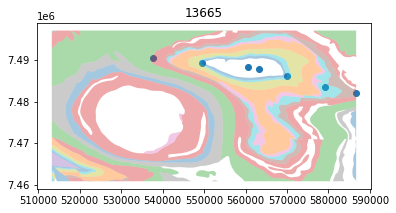

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
for i in np.unique(fat_id):
    plt.scatter(fat.loc[fat_id==i,'X'],fat.loc[fat_id==i,'Y'])
    import geopandas
    geol.plot(column='formation',ax=plt.gca(),alpha=0.4)
    plt.title('{}'.format(i))
    plt.figure()

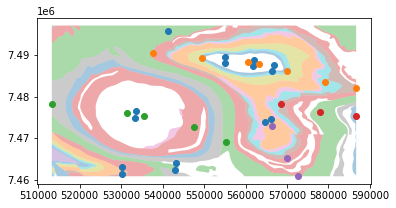

In [40]:
ids = [13665, 11202, 11183, 13631]
geol.plot(column='formation',ax=plt.gca(),alpha=0.4)
plt.scatter(fat_o['X'],fat_o['Y'])
for i in ids:
    plt.scatter(fat.loc[fat_id==i,'X'],fat.loc[fat_id==i,'Y'])
    

In [199]:
from LoopStructural.utils.helper import all_heading#empty_dataframe

In [324]:
import pickle
with open('m2l_data.pkl','wb') as f:
    pickle.dump(m2l_data,f)

In [310]:
foldmodel = GeologicalModel(model.origin,model.maximum)


In [311]:
data = pd.DataFrame(columns=all_heading(),dtype=float)#empty_dataframe()

In [312]:
for i in [13665, 11202, 11183, 13631]:
    pts = fat.loc[fat_id==i,['X','Y','Z']].to_numpy()
    for p in pts:
        data.loc[len(data),['X','Y','Z','val','feature_name','coord']] = [p[0],p[1],p[2],0,'fold_{}'.format(i),0]
    vec = pts[0,:]-pts[-1,:]
    vec/=np.linalg.norm(vec)
    data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name','coord']] = [p[0],p[1],p[2],vec[-1],-vec[0],0,'fold_{}'.format(i),0]
    data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name','coord']] = [p[0],p[1],p[2],vec[0],vec[1],0,'fold_{}'.format(i),1]


In [313]:
d2add = m2l_data['data'].loc[m2l_data['data']['feature_name']=='supergroup_0',['X','Y','Z','val','nx','ny','nz','feature_name']]
#d2add.loc[:,['X','Y']]
d2add.rename(columns={'nx':'gx','ny':'gy','nz':'gz'},inplace=True)

In [314]:
data = pd.concat([data,d2add])

In [315]:
data.loc[data['feature_name']=='supergroup_0','val'] = np.nan
foldmodel.set_model_data(data)

In [316]:
foldmodel.create_and_add_fold_frame('fold_13665',
                                    solver='lu',
                                    nelements=1e4,
                                    data_region=0.1
                                   )

In [317]:
foldregion = lambda xyz:  ~np.isnan(foldmodel['fold_13665'][0].evaluate_value(xyz))

In [318]:
foldmodel.create_and_add_folded_foliation('supergroup_0',solver='lu',nelements=1e5,npw=1,gpw=1,foldregion=foldregion)

In [319]:
foldmodel['supergroup_0'].interpolator.c

array([0., 0., 0., ..., 0., 0., 0.])

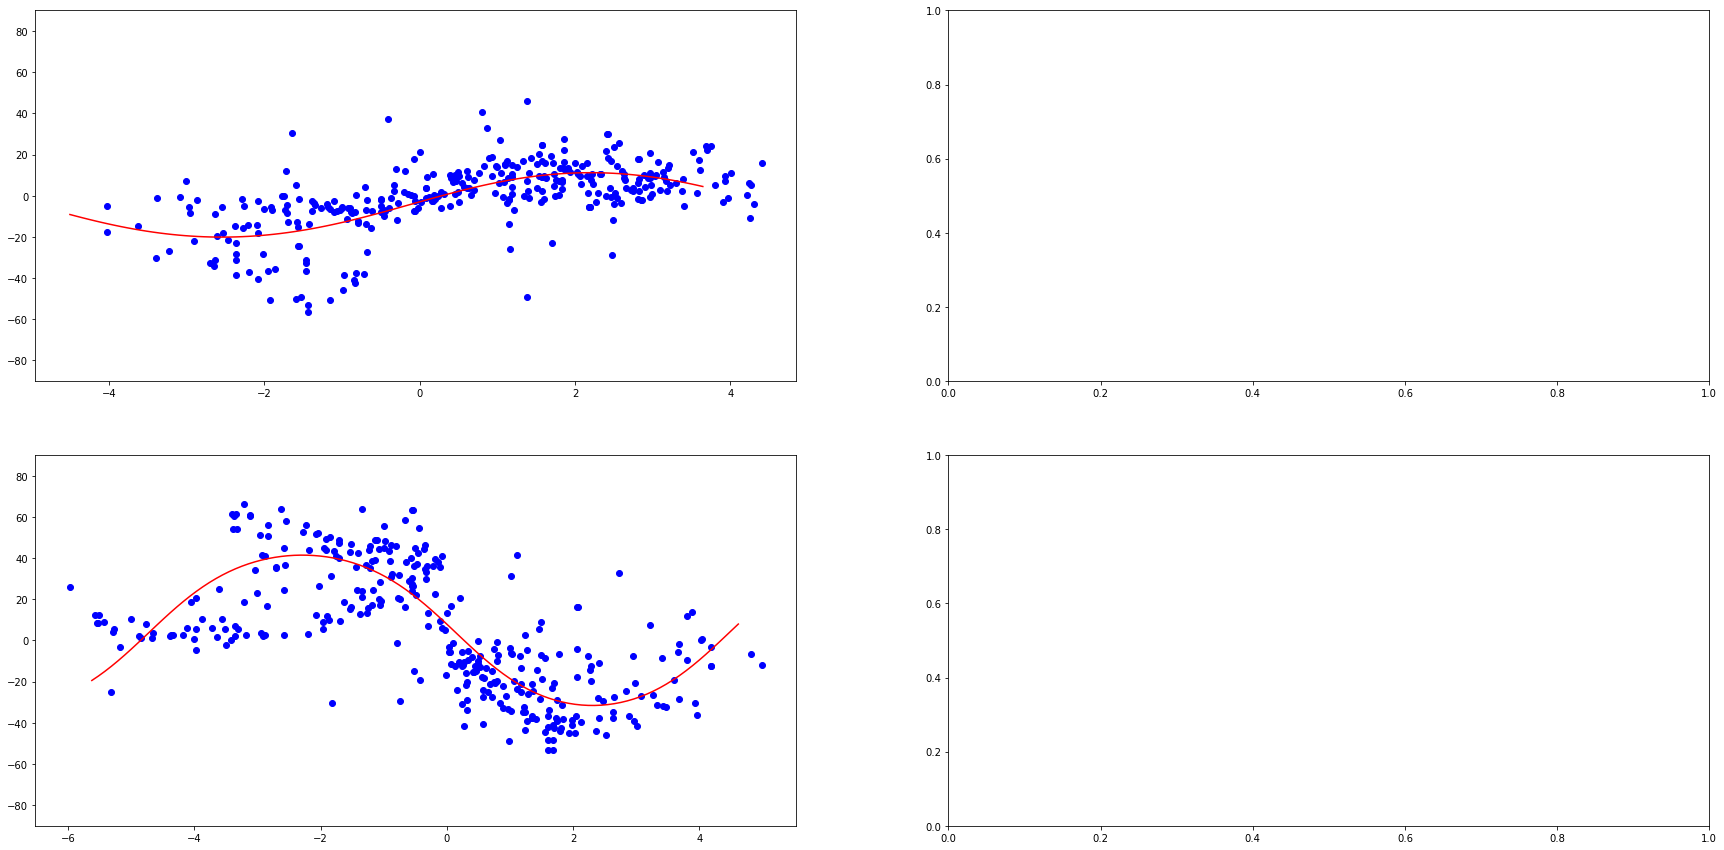

In [320]:
from LoopStructural.visualisation import RotationAnglePlotter
splot = RotationAnglePlotter(foldmodel['supergroup_0'])
splot.add_fold_limb_data()
splot.add_fold_limb_curve()
splot.add_fold_axis_data()
splot.add_fold_axis_curve()

In [321]:
class LambdaGeologicalFeature:
    def __init__(self,function = None,name = 'unnamed_lambda', gradient_function = None):
        self.function = function
        self.name = name
        self.gradient_function = gradient_function
    def evaluate_value(self, xyz):
        v = np.zeros((xyz.shape[0]))
        if self.function is None:
            v[:] =  np.nan
        else:
            v[:] = self.function(xyz)
        return v
    def evaluate_gradient(self,xyz):
        v = np.zeros((xyz.shape[0],3))
        if self.gradient_function is None:
            v[:,:] =  np.nan
        else:
            v[:,:] = self.gradient_function(xyz)
        return v
    def min(self):
        return 0
    def max(self):
        return 1
regionfeature = LambdaGeologicalFeature(foldregion)


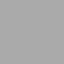

In [322]:
foldview = LavaVuModelViewer(foldmodel)
foldview.add_isosurface(foldmodel.features[0][0],value=0)
foldview.add_isosurface(foldmodel.features[0][1],value=0)
foldview.add_data(foldmodel['fold_13665'][0])
foldview.add_isosurface(foldmodel['supergroup_0'])
foldview.add_scalar_field(foldmodel['supergroup_0'])
foldview.add_data(foldmodel['supergroup_0'])
foldview.add_scalar_field(regionfeature)
foldview.add_scalar_field(foldmodel['fold_13665'][0])
foldview.interactive()